In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('regression_data.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


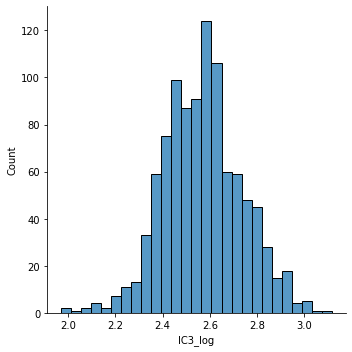

In [3]:
def log_transfom_clean_(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 
data['IC3_log'] = list(map(log_transfom_clean_, data['IC3']))
data['IC3_log'] = data['IC3_log'].fillna(np.mean(data['IC3_log']))
sns.displot(data['IC3_log'])
plt.show()

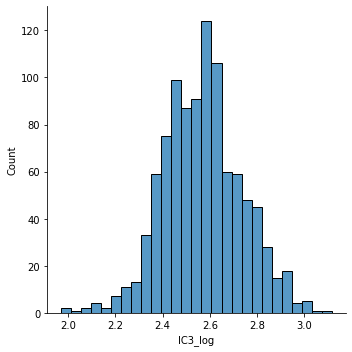

In [4]:
iqr = np.percentile(data['IC3_log'],75) - np.percentile(data['IC3_log'],25)
upper_limit = np.percentile(data['IC3_log'],75) + 3*iqr
lower_limit = np.percentile(data['IC3_log'],25) - 3*iqr
data = data[(data['IC3_log']>lower_limit) & (data['IC3_log']<upper_limit)]
sns.displot(data['IC3_log'])
plt.show()